# TUGAS KELOMPOK PCD [Dengan Library]

* Input 2 dimensi gambar monokrom dan dibuat operasi logika matematik (and, or, not)

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
def show_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [21]:
# Load 2 gambar (bisa ubah ubah)
img1 = cv2.imread('./image/image1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./image/image2.png', cv2.IMREAD_GRAYSCALE)

# Resize (opsional sih)
# img1 = cv2.resize(img1, (300, 300))
# img2 = cv2.resize(img2, (300, 300))

# Operasi logika
not_img1 = cv2.bitwise_not(img1)
not_img2 = cv2.bitwise_not(img2)
and_img = cv2.bitwise_and(img1, img2)
or_img = cv2.bitwise_or(img1, img2)
and_not_img1 = cv2.bitwise_and(img1, not_img2)
and_not_img2 = cv2.bitwise_and(img2, not_img1)
xor_img = cv2.bitwise_xor(img1, img2)
xnor_img = cv2.bitwise_not(xor_img)
nor_img = cv2.bitwise_not(or_img)
nand_img = cv2.bitwise_not(and_img)

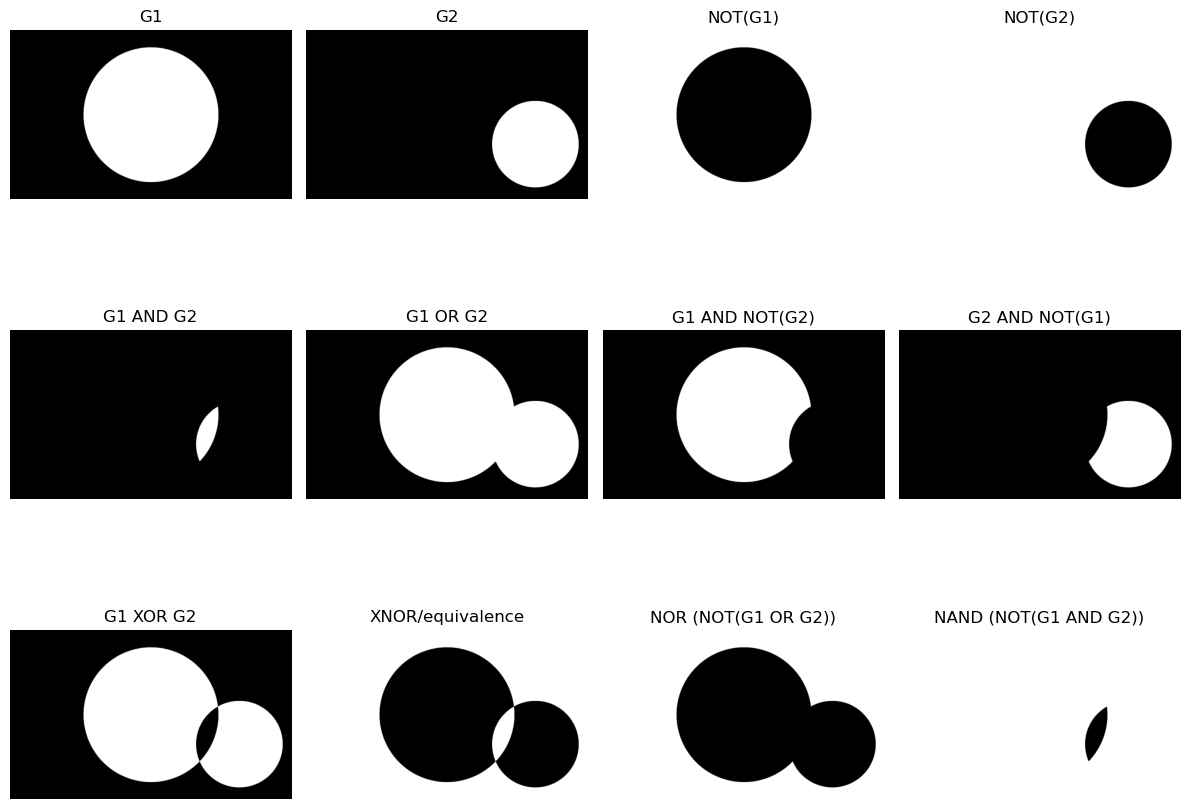

In [24]:
# Tampilan
plt.figure(figsize=(12, 10))

titles = ['G1', 'G2', 'NOT(G1)', 'NOT(G2)', 'G1 AND G2', 'G1 OR G2', 'G1 AND NOT(G2)', 
          'G2 AND NOT(G1)', 'G1 XOR G2', 'XNOR/equivalence', 'NOR (NOT(G1 OR G2))', 
          'NAND (NOT(G1 AND G2))']
images = [img1, img2, not_img1, not_img2, and_img, or_img, and_not_img1, and_not_img2, xor_img, xnor_img, nor_img, nand_img]

for i in range(len(images)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Simpen gambar (opsional)
cv2.imwrite('./output/not_image1.png', not_img1)
cv2.imwrite('./output/not_image2.png', not_img2)
cv2.imwrite('./output/and_image.png', and_img)
cv2.imwrite('./output/or_image.png', or_img)
cv2.imwrite('./output/and_not_image1.png', and_not_img1)
cv2.imwrite('./output/and_not_image2.png', and_not_img2)
cv2.imwrite('./output/xor_image.png', xor_img)
cv2.imwrite('./output/xnor_image.png', xnor_img)
cv2.imwrite('./output/nor_image.png', nor_img)
cv2.imwrite('./output/nand_image.png', nand_img)

print("Images saved")


In [ ]:
def read_grayscale_image(file_path):
    try:
        img = Image.open(file_path).convert('L')
        return list(img.getdata())
    except Exception as e:
        print(f"Error reading image {file_path}: {e}")
        return None

def image_to_2d(img_data, width):
    return [img_data[i:i+width] for i in range(0, len(img_data), width)]

def bitwise_not(image):
    return [[255 - pixel for pixel in row] for row in image]

def bitwise_and(image1, image2):
    return [[p1 & p2 for p1, p2 in zip(row1, row2)] 
            for row1, row2 in zip(image1, image2)]

def bitwise_or(image1, image2):
    return [[p1 | p2 for p1, p2 in zip(row1, row2)] 
            for row1, row2 in zip(image1, image2)]

def bitwise_xor(image1, image2):
    return [[p1 ^ p2 for p1, p2 in zip(row1, row2)] 
            for row1, row2 in zip(image1, image2)]

def bitwise_xnor(image1, image2):
    xor_result = bitwise_xor(image1, image2)
    return bitwise_not(xor_result)

def bitwise_nor(image1, image2):
    or_result = bitwise_or(image1, image2)
    return bitwise_not(or_result)

def bitwise_nand(image1, image2):
    and_result = bitwise_and(image1, image2)
    return bitwise_not(and_result)

def bitwise_and_not(image1, image2):
    not_image2 = bitwise_not(image2)
    return bitwise_and(image1, not_image2)

def bitwise_and_not_reverse(image1, image2):
    not_image1 = bitwise_not(image1)
    return bitwise_and(image2, not_image1)

def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(3, 4, i)  # Changed to 3 rows and 4 columns to accommodate all operations
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
img1_pil = Image.open('./image/istockphoto-1345568023-612x612.jpg')
img2_pil = Image.open('./image/img4.png')

width, height = img1_pil.size
img2_pil = img2_pil.resize((width, height))

img1_gray = img1_pil.convert('L')
img2_gray = img2_pil.convert('L')

img1_data = list(img1_gray.getdata())
img2_data = list(img2_gray.getdata())

img1 = image_to_2d(img1_data, width)
img2 = image_to_2d(img2_data, width)

not_img1 = bitwise_not(img1)
not_img2 = bitwise_not(img2)
and_img = bitwise_and(img1, img2)
or_img = bitwise_or(img1, img2)
and_not_img1 = bitwise_and_not(img1, img2)
and_not_img2 = bitwise_and_not_reverse(img1, img2)
xor_img = bitwise_xor(img1, img2)
xnor_img = bitwise_xnor(img1, img2)
nor_img = bitwise_nor(img1, img2)
nand_img = bitwise_nand(img1, img2)

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),        
    np.array(img1_gray),      
    np.array(img2_gray),      
    np.array(not_img1),       
    np.array(not_img2),       
    np.array(and_img),        
    np.array(or_img),         
    np.array(and_not_img1),     
    np.array(and_not_img2),     
    np.array(xor_img),        
    np.array(xnor_img),       
    np.array(nor_img),        
    np.array(nand_img)        
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'Grayscale G1', 
    'Grayscale G2', 
    'NOT(G1)', 
    'NOT(G2)', 
    'G1 AND G2', 
    'G1 OR G2', 
    'G1 AND NOT(G2)', 
    'G2 AND NOT(G1)', 
    'G1 XOR G2', 
    'XNOR/equivalence', 
    'NOR (NOT(G1 OR G2))', 
    'NAND (NOT(G1 AND G2))'
]

plt.figure(figsize=(15, 10))
for i, (img, title) in enumerate(zip(display_images, titles), 1):
    plt.subplot(4, 4, i)
    if i <= 2:  
        plt.imshow(img)
    elif i <= 4:  
        plt.imshow(img, cmap='gray')
    else:  
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()